# **Описание датасета**

**Датасет.**
Для анализа был выбран [Student Course Completion Prediction Dataset](https://www.kaggle.com/datasets/nisargpatel344/student-course-completion-prediction-dataset?resource=download).

**Предметная область.**

Датасет содержит информацию о студентах, зачисленных на различные онлайн курсы. Включены данные как о курсах: их сложности, направленности, требуемом времени, так и о самих студентах: их уровне образования, условиях жизни и том, как они проявляют себя на курсе.

**Источник и характер данных.**

Данные были полностью сгенерированы с помощью питона с использованием генератора случайных значений и некоторых логических правил. Хотя данные и не описывают настоящих людей, они симулируют реалистичное поведение студентов, основываясь на определённых поведенческих паттернах, взятых за основу автором скрипта.

**Задача анализа.**

Задача анализа - предсказать, кто из студентов завершит курс, а кто нет. Прваильность предположения можно оценить, сравнив его с готовым ответом, содержащемся в самих данных.

**Атрибуты.**

Student_ID - уникальный идентификатор студента, строка

Name - имя студента, строка

Gender - пол студента, строка

Age - возраст студента, число

Education_Level - учёная степень, строка

Employment_Status - есть ли место работы, строка

City - город проживания, строка

Device_Type - электронное устройство для прохождения курса, строка

Internet_Connection_Quality - Качество связи, строка

Course_ID - идентификатор курса, строка

Course_Name - название курса, строка

Category - тематика курса, строка

Course_Level - уровень сложности курса, строка

Course_Duration_Days - длительность курса в днях, число

Instructor_Rating средняя оценка инструктора, число

Login_Frequency - частота входа студента в систему, число

Average_Session_Duration_Min - среднее время нахождения в системе в минутах, число

Video_Completion_Rate - доля просмотренных видеозантий курса, число

Discussion_Participation - количество участий студента в дискуссиях на форуме, число

Time_Spent_Hours - время, проведённое за изучением курса в часах, число

Days_Since_Last_Login - количество дней с последнего входа в систему, число

Notifications_Checked - количество раз, когда студент прверял уведомления системы, число

Peer_Interaction_Score - оценка качества и количества взаимодействия с сокурсниками, число

Assignments_Submitted - количество успешно сданных заданий, число

Assignments_Missed - количество заданий, не сданных в срок, число

Quiz_Attempts - количество попыток прохождения всех тестов курса, число

Quiz_Score_Avg - средний балл прохождения тестов курса, число

Project_Grade - баллы за выполнение проекта, число

Progress_Percentage - процент прогресса в прохождении курса, число

Rewatch_Count - колчисество повторных просмотров информации курса. число

Enrollment_Date - дата зачисления на курс, строка

Payment_Mode - метод оплаты курса, строка

Fee_Paid - был ли оплачен курс, строка

Discount_Used - была ли использована скидка, строка

Payment_Amount - цена курса, число

App_Usage_Percentage - процент использования приложения курсана электронном устройстве, число

Reminder_Emails_Clicked - количество сообщений с напоминаниями от курса, которые студент открыл, число

Support_Tickets_Raised - количество просьб о студента о помощи, число

Satisfaction_Rating - общий уровень удовлетворения студента, число

Completed - завершён ли курс, строка

# **Очистка датасета**

Что конкретно было сделано:
*   Удалены дубли (таких не оказалось).
*   Удалены строки с пропущенными значениями (таких не оказалось).
*   Выбросы заменены на минимальные и максимальные значения, вписывающиеся в рамки нормальных.



In [12]:
import pandas as pd
import numpy as np

df = pd. read_csv ("Course_Completion_Prediction.csv")
df = df. drop_duplicates ()
df = df. dropna ()

numericColumns = df. select_dtypes (include = [np. number]). columns
for column in numericColumns :
    q1 = df [column]. quantile (0.25)
    q3 = df [column]. quantile (0.75)
    iqr = q3 - q1
    lowerBound = q1 - 1.5 * iqr
    upperBound = q3 + 1.5 * iqr

    lowerBound = df [column]. dtype. type (lowerBound)
    upperBound = df [column]. dtype. type (upperBound)
    df. loc [df [column] < lowerBound, column] = lowerBound
    df. loc [df [column] > upperBound, column] = upperBound

# **Добавление атрибута**

В таблицу был добавлен атрибут Engagement_Score.
*   Является целым числом от 1 до 100
*   Означает общую вовлечённость студента в курс
*   Рассчитываестя на основе параметров Time_Spent_Hours, Video_Completion_Rate, Quiz_Score_Avg, Assignments_Submitted





In [13]:
engagementScores = (
    df ['Time_Spent_Hours'] * 0.25 +
    df ['Video_Completion_Rate'] * 0.25 +
    df ['Quiz_Score_Avg'] * 0.25 +
    df ['Assignments_Submitted'] * 0.25
)

maxScore = engagementScores. max ()
minScore = engagementScores. min ()

df ['Engagement_Score'] = ((engagementScores - minScore) / (maxScore - minScore) * 99 + 1). astype (int)

# **Графики зависимости**
Так как атрибутов очень много, лдя построения графиков были выбраны только некоторые из них, которые с наибольшей долей вероятности позволят сформировать кластеры.

**Анализ:**
Больше всего похожи на формирующие кластеры пары:

1.   Payment_Amount <-> Progress_Percentage
2.   Discussion_Participation <-> Progress_Percentage
3.   Video_Completion_Rate <-> Progress_Percentage

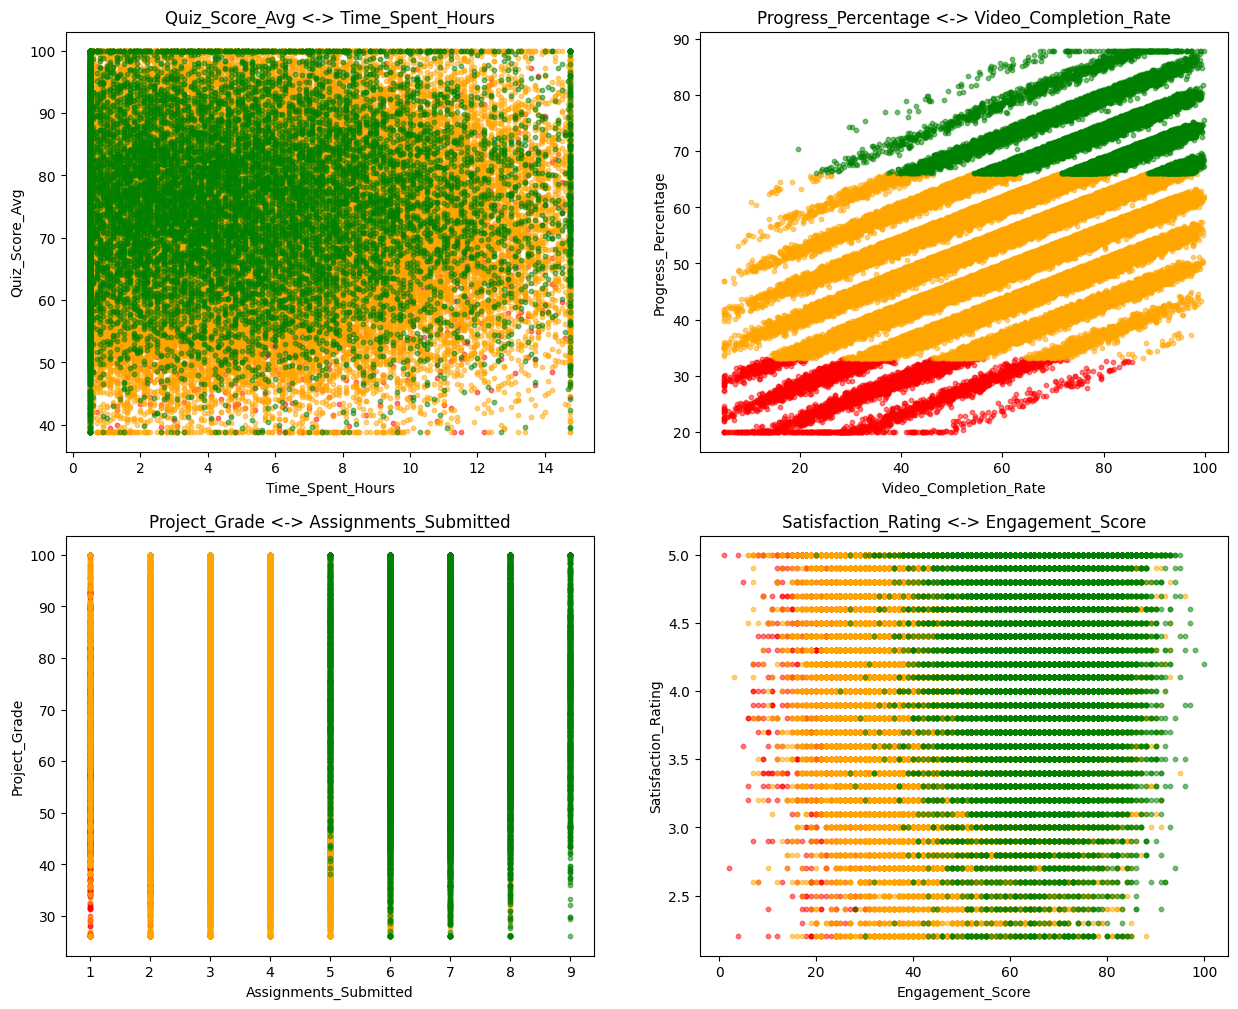

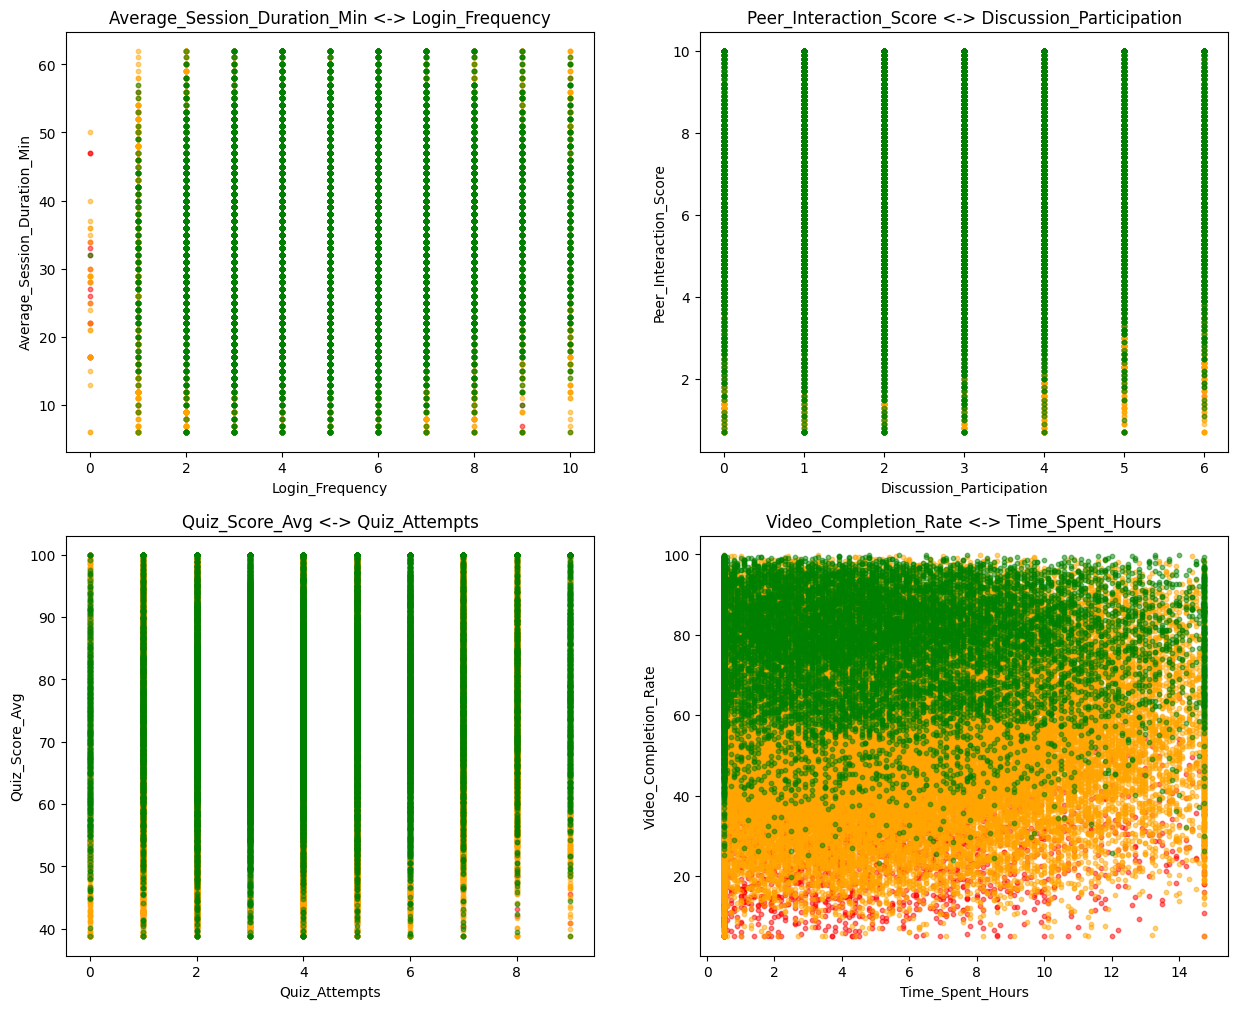

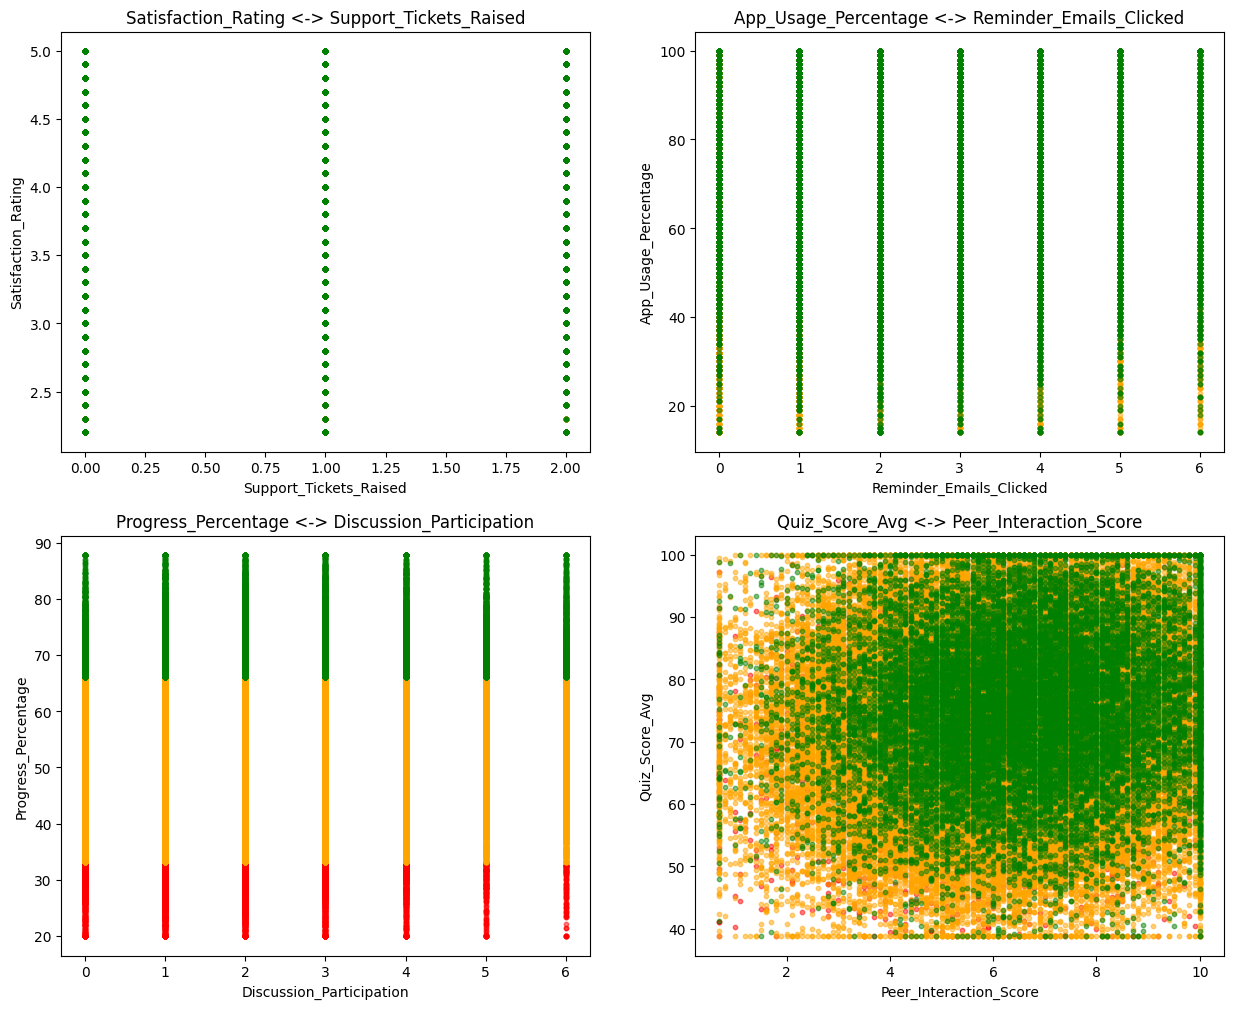

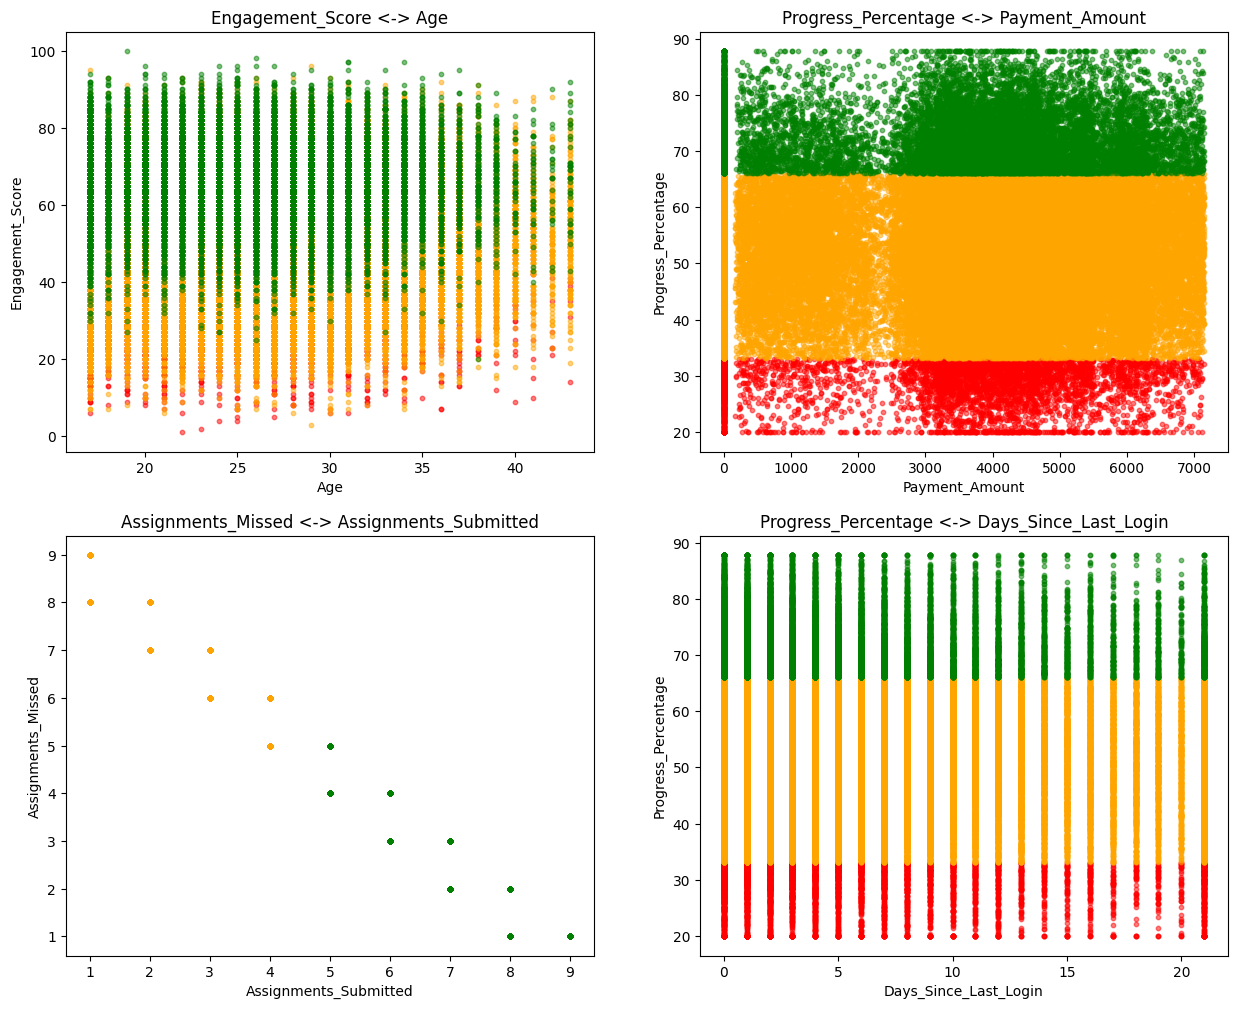

In [15]:
import matplotlib. pyplot as plt

plt. rcParams ["figure.figsize"] = (15, 12)

df ["Progress_Category"] = pd. cut (df ["Progress_Percentage"],
                                bins = [0, 33, 66, 100],
                                labels = ["Low Progress", "Medium Progress", 'High Progress'])

featurePairs = [
    ("Time_Spent_Hours", "Quiz_Score_Avg"),
    ("Video_Completion_Rate", "Progress_Percentage"),
    ("Assignments_Submitted", "Project_Grade"),
    ("Engagement_Score", "Satisfaction_Rating"),
    ("Login_Frequency", "Average_Session_Duration_Min"),
    ("Discussion_Participation", "Peer_Interaction_Score"),
    ("Quiz_Attempts", "Quiz_Score_Avg"),
    ("Time_Spent_Hours", "Video_Completion_Rate"),
    ("Support_Tickets_Raised", "Satisfaction_Rating"),
    ("Reminder_Emails_Clicked", "App_Usage_Percentage"),
    ("Discussion_Participation", "Progress_Percentage"),
    ("Peer_Interaction_Score", "Quiz_Score_Avg"),
    ("Age", "Engagement_Score"),
    ("Payment_Amount", "Progress_Percentage"),
    ("Assignments_Submitted", "Assignments_Missed"),
    ("Days_Since_Last_Login", "Progress_Percentage")
]

figures = []
for i in range (4) :
    figure, axes = plt. subplots (2, 2, figsize = (15, 12))
    figures. append (figure)

    axes = axes. flatten ()

    start = i * 4
    end = start + 4

    for j, (xFeature, yFeature) in enumerate (featurePairs [start : end]) :
        ax = axes [j]

        lowProgress = df [df ["Progress_Category"] == "Low Progress"]
        mediumProgress = df [df ["Progress_Category"] == "Medium Progress"]
        highProgress = df [df ["Progress_Category"] == "High Progress"]

        ax. scatter (lowProgress [xFeature], lowProgress [yFeature],
                  color = "red", label = "Low Progress", s = 10, alpha = 0.5)
        ax. scatter (mediumProgress [xFeature], mediumProgress[yFeature],
                  color = "orange", label = "Medium Progress", s = 10, alpha = 0.5)
        ax. scatter (highProgress [xFeature], highProgress[yFeature],
                  color = "green", label = "High Progress", s = 10, alpha = 0.5)

        ax. set_xlabel (xFeature)
        ax. set_ylabel (yFeature)
        ax. set_title (yFeature + " <-> " + xFeature)

plt. show ()

# **Применение KMeans для кластеризции**

Начнём применение метода с масштабирования данных для числовых колонок датасета и применения метода локтя для поиска оптимального числа кластеров.

**Выводы:**
Так как максимальное значение достигается при k = 2, это и будем считать оптимальным количеством кластеров.

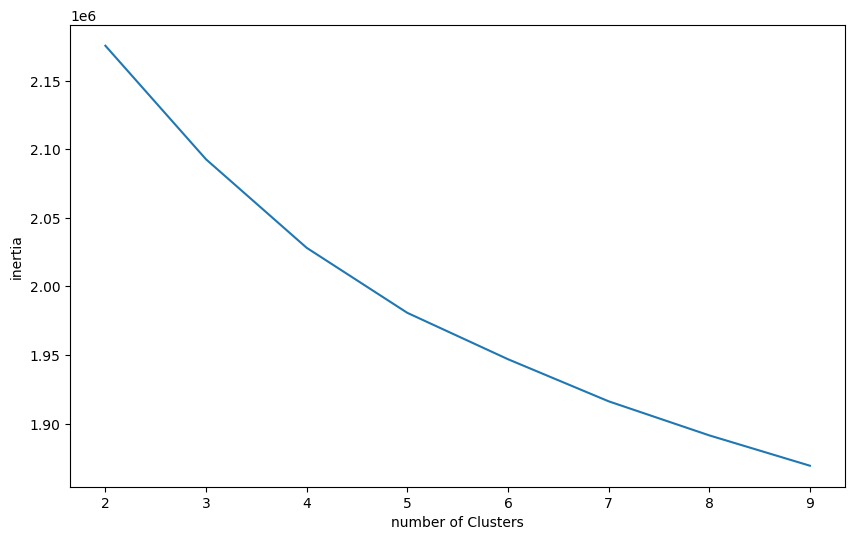

In [16]:
from sklearn. preprocessing import StandardScaler
from sklearn. cluster import KMeans

numericColumns = df. select_dtypes (include = [np. number]). columns
dfNumeric = df [numericColumns]

features = [
    "Time_Spent_Hours",
    "Video_Completion_Rate",
    "Quiz_Score_Avg",
    "Assignments_Submitted",
    "Discussion_Participation",
    "Login_Frequency",
    "Average_Session_Duration_Min",
    "Progress_Percentage",
    "Engagement_Score",
    "Payment_Amount"
]

scaled = StandardScaler (). fit_transform (dfNumeric)

clasterRange = range (2, 10)
inertiaValues = []

for numClasters in clasterRange:
    kmeans = KMeans (n_clusters = numClasters, random_state = 42, n_init = 10)
    kmeans. fit (scaled)
    inertiaValues. append (kmeans. inertia_)

plt. figure (figsize = (10, 6))
plt. plot (clasterRange, inertiaValues)
plt. xlabel ("number of Clusters")
plt. ylabel ("inertia")
plt. show ()

# **Кластеризация методом KMeans.**

Что именно было сделано:
*   Выполнено разделение на 2 кластера по проценту прохождения курса.
*   Вычисленs средние значения признаков для строк, входящих в разные кластеры.

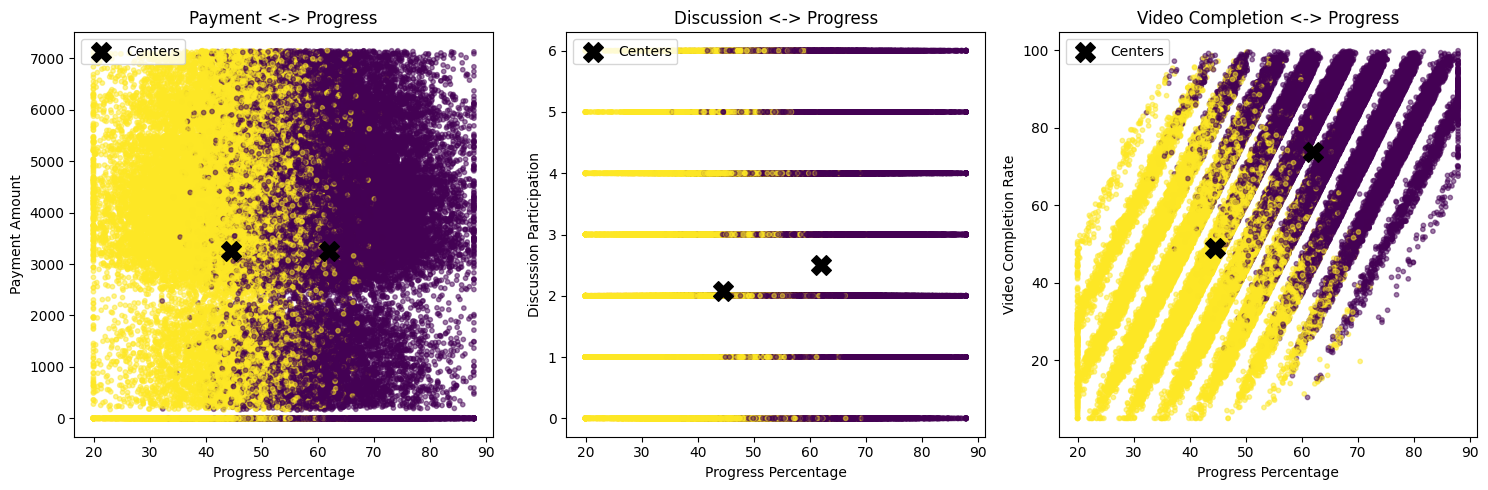

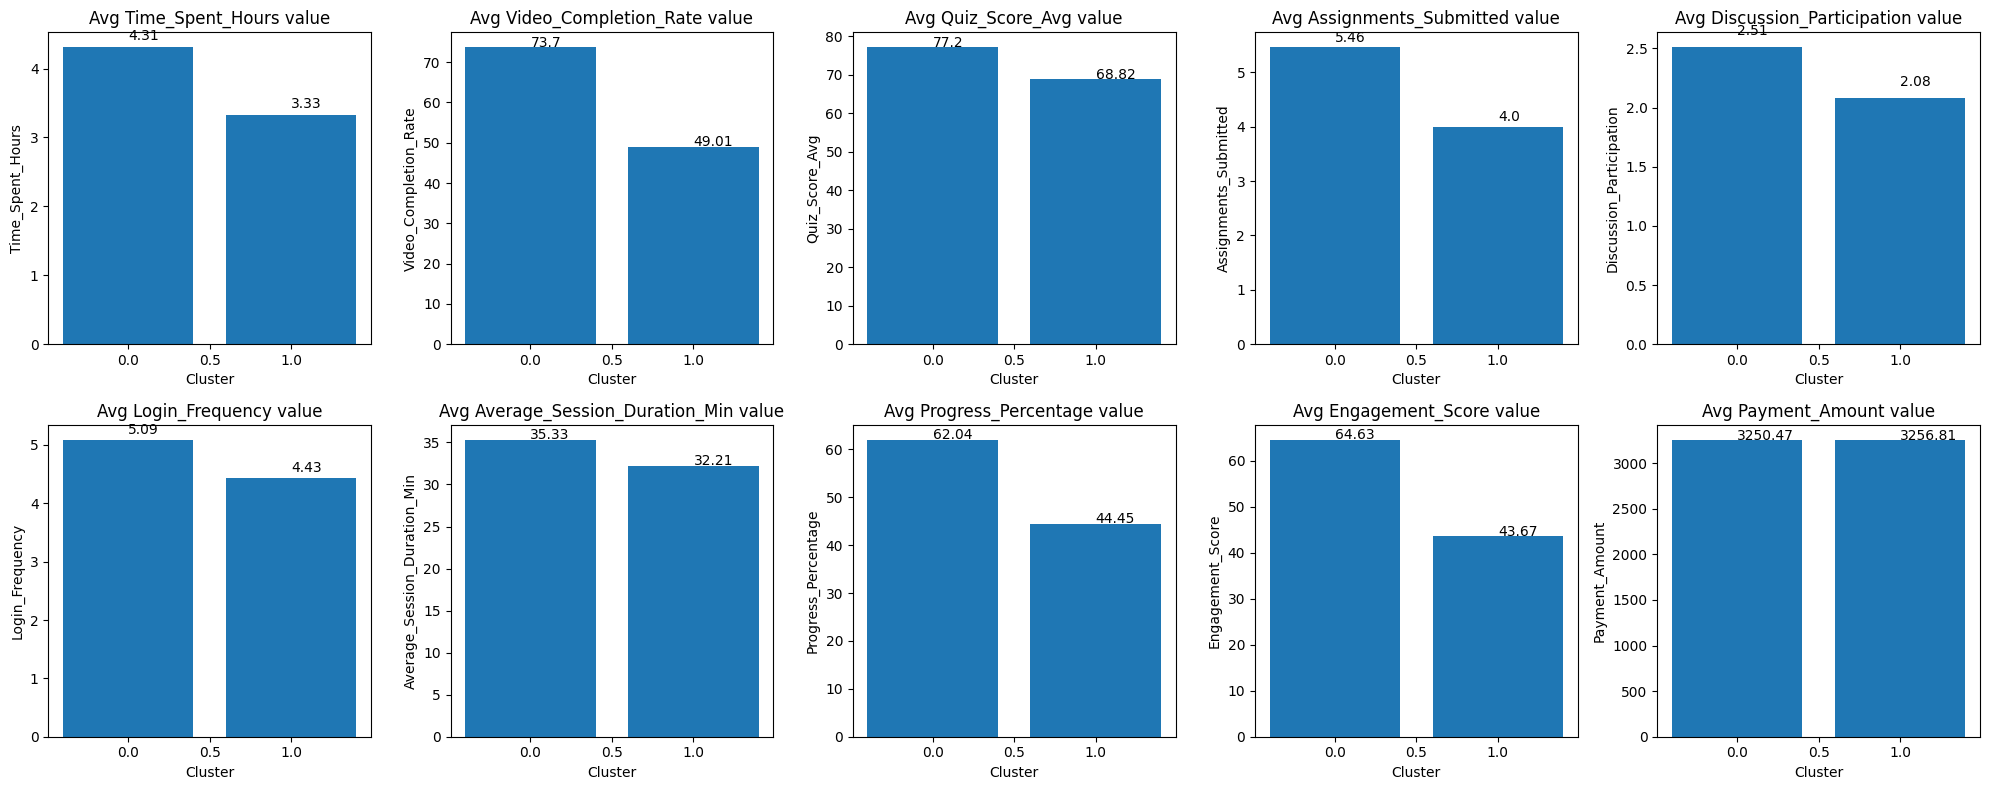

In [17]:
df = df [features]
scaler = StandardScaler ()
scaled = scaler. fit_transform (df)

kmeans = KMeans (n_clusters = 2)
clusters = kmeans. fit_predict (scaled)

df ["Cluster"] = clusters

clusterCenters = scaler. inverse_transform (kmeans. cluster_centers_)
clusterCentersDf = pd. DataFrame (clusterCenters, columns = features)

plt. figure (figsize = (15, 5))

plt. subplot (1, 3, 1)
plt .scatter (df ["Progress_Percentage"], df ["Payment_Amount"],
           c = df ["Cluster"], s = 10, alpha = 0.5)
plt. scatter (clusterCentersDf ["Progress_Percentage"], clusterCentersDf ["Payment_Amount"],
           c = "black", marker = "X", s = 200, label = "Centers")
plt. xlabel ("Progress Percentage")
plt. ylabel ("Payment Amount")
plt. title ("Payment <-> Progress")
plt. legend ()

plt.subplot(1, 3, 2)
plt .scatter (df ["Progress_Percentage"], df ["Discussion_Participation"],
           c = df ["Cluster"], s = 10, alpha = 0.5)
plt. scatter (clusterCentersDf ["Progress_Percentage"], clusterCentersDf ["Discussion_Participation"],
           c = "black", marker = "X", s = 200, label = "Centers")
plt. xlabel ("Progress Percentage")
plt. ylabel ("Discussion Participation")
plt. title ("Discussion <-> Progress")
plt. legend ()

plt.subplot(1, 3, 3)
plt .scatter (df ["Progress_Percentage"], df ["Video_Completion_Rate"],
           c = df ["Cluster"], s = 10, alpha = 0.5)
plt. scatter (clusterCentersDf ["Progress_Percentage"], clusterCentersDf ["Video_Completion_Rate"],
           c = "black", marker = "X", s = 200, label = "Centers")
plt. xlabel ("Progress Percentage")
plt. ylabel ("Video Completion Rate")
plt. title ("Video Completion <-> Progress")
plt. legend ()

plt. tight_layout ()
plt. show ()

stats = df. groupby ("Cluster") [features]. mean (). round (2)

fig, axes = plt. subplots (2, 5, figsize = (20, 8))
axes = axes. flatten ()

for i, feature in enumerate (features) :
    bars = axes [i]. bar (stats. index, stats [feature])
    axes [i]. set_title ("Avg " + feature + " value")
    axes [i]. set_xlabel ("Cluster")
    axes [i]. set_ylabel (feature)

    for bar, value in zip (bars, stats [feature]) :
        axes [i]. text (bar. get_x () + bar. get_width () / 2, bar. get_height () + 0.1, str(round(value, 3)))

plt. tight_layout ()
plt. show ()

# **Выводы**

В ходе работы была проведена очистка данных, добавлен новый параметр в датасет. Графики зависимости различных числовых величин помогли найти некоторые зависимости, которые стали основой для формирования кластеров в будущем. Самыми яркими зависимостями стали Payment_Amount - Progress_Percentage, Discussion_Participation - Progress_Percentage, Video_Completion_Rate - Progress_Percentage. Основной и завершающей часть работы было применение методы кластеризации KMeans. Было вычислено оптимальное количество кластеров, постоены графики графики, визуализирующие кластеры для найденных зависимостей, а также построены графики, показывающие среднее значение по разным параметрам в кластерах.